## Проект по теме "Прогнозирование наличия сердечно-сосудистых заболеваний на основе характеристик пациентов"

Датасет представляет собой .csv файл, содержащий следующие поля:

* id: идентификатор для каждого человека в наборе данных;
* age: возраст человека (в днях);
* gender: пол (1 для женщин, 2 для мужчин);
* height: рост в сантиметрах;
* weight: вес в килограммах;
* ap_hi: систолическое артериальное давление (измеряется в мм рт.ст.);
* ap_lo: диастолическое артериальное давление (измеряется в мм рт.ст.);
* cholesterol: уровень холестерина (1 – в норме, 2 – выше нормы, 3 –
значительно выше нормы);
* gluc: уровень глюкозы (1 – в норме, 2 – выше нормы, 3 – значительно выше
нормы);
* smoke: курит ли человек (0 – нет, 1 – да);
* alco: употребляет ли человек алкоголь (0 – нет, 1 – да);
* active: является ли человек физически активным (0 – нет, 1 – да);
* cardio: наличие сердечно-сосудистых заболеваний (0 – нет, 1 – да).

Задачей является построить модель, предсказывающую наличие сердечно-сосудистых заболеваний.
Вам необходимо реализовать все дальнейшие шаги, обучить модель и оценить её качество.

## Задание 1: загрузка файла и проверка пропущенных значений (5 баллов)

Откройте данные и изучите их: есть ли пропущенные значения? Прокомментируйте результат. Если пропущенные значения есть - удалите строки с ними.

In [1]:
# 1.Загрузка данных из Google Sheets. 
# Используем pandas для чтения CSV-файла по ссылке (Google Sheets позволяет экспортировать данные в CSV). Важно: Для работы с Google Sheets через URL нужно заменить часть ссылки на export?format=csv.

import pandas as pd

# URL файла (заменяем '/edit#' на '/export?format=csv')
url = "https://docs.google.com/spreadsheets/d/1DAwgFAKRFEkoRS4kkaTQ119301ebxBit/export?format=csv&gid=231888029"

# Загрузка данных
try:
    data = pd.read_csv(url)
    print("Данные успешно загружены!")
except Exception as e:
    print(f"Ошибка загрузки: {e}")
    data = None

# Вывод первых 5 строк для проверки
if data is not None:
    display(data.head())

Данные успешно загружены!


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [2]:
# 2. Проверка пропущенных значений. 
# Анализируем количество пропусков (NaN) в каждой колонке и их долю от общего числа строк.

if data is not None:
    # Общее количество пропусков по колонкам
    missing_values = data.isnull().sum()
    
    # Доля пропусков в процентах
    missing_percent = (data.isnull().mean() * 100).round(2)
    
    # Сводная таблица
    missing_report = pd.DataFrame({
        'Количество пропусков': missing_values,
        'Доля пропусков (%)': missing_percent
    })
    
    print("Отчёт о пропущенных значениях:")
    display(missing_report)
    
    # Если пропусков нет, таблица будет заполнена нулями. Если есть — увидим количество и процент для каждой колонки.

Отчёт о пропущенных значениях:


,Количество пропусков,Доля пропусков (%)
id,0,0.0
age,0,0.0
gender,0,0.0
height,0,0.0
weight,0,0.0
ap_hi,0,0.0
ap_lo,0,0.0
cholesterol,0,0.0
gluc,0,0.0
smoke,0,0.0


In [3]:
# 3. Удаление строк с пропусками (если они есть). 
# Если пропуски обнаружены, удаляем все строки, содержащие хотя бы один NaN.Комментарий: Это строгий подход, но он корректен для учебного проекта, если пропусков немного.

if data is not None:
    # Количество строк до удаления
    original_rows = data.shape[0]
    
    # Удаление строк с пропусками
    data_cleaned = data.dropna(axis=0)
    
    # Количество строк после удаления
    cleaned_rows = data_cleaned.shape[0]
    
    # Проверка изменений
    if original_rows != cleaned_rows:
        print(f"Удалено строк: {original_rows - cleaned_rows}")
        print(f"Осталось строк: {cleaned_rows}")
    else:
        print("Пропущенных значений не обнаружено. Данные не изменены.")
    
    # Перезаписываем исходный датафрейм (если нужно)
    data = data_cleaned.copy()

Пропущенных значений не обнаружено. Данные не изменены.


In [4]:
# 4. Итоговая проверка
# Убедимся, что пропуски полностью удалены:

if data is not None:
    print("Проверка после очистки:")
    print(f"Общее количество пропусков: {data.isnull().sum().sum()}")

Проверка после очистки:
Общее количество пропусков: 0


***Важные комментарии***

1) Почему dropna?
Удаление строк — простой и надёжный способ для учебного проекта, но в реальной задаче можно рассмотреть:

* Заполнение медианой/средним (для числовых данных),

* Предсказание пропусков через модель.

2) Логирование
* Код включает проверки на каждом этапе, чтобы избежать ошибок (например, при загрузке).

3) Дальнейшие шаги
* После очистки данных можно переходить к EDA (анализу распределений, выбросов и т.д.).

---

## Задание 2: проверка данных на мультиколлинеарность (15 баллов)

**2.1** Данные обязательно необходимо проверить на мультиколлинеарность: линейную взаимосвязь между признаками. Сначала проверим наличие чистой мультиколлинеарности. Для того, чтобы её идентифицировать - для начала посчитайте ранг для матрицы корреляций и ее определитель. Какой вывод можно сделать?

In [5]:
# Мультиколлинеарность возникает, когда признаки линейно зависимы (или почти зависимы), что может ухудшить качество модели. Для проверки используем ранг матрицы корреляций и её определитель.

import pandas as pd
import numpy as np

# Загрузка данных (если ещё не загружены)
url = "https://docs.google.com/spreadsheets/d/1DAwgFAKRFEkoRS4kkaTQ119301ebxBit/export?format=csv&gid=231888029"
data = pd.read_csv(url)

# Удаление строк с пропусками (если не сделано ранее)
data = data.dropna()

# Выделяем числовые признаки (исключаем целевую переменную и категориальные колонки)
numerical_data = data.select_dtypes(include=['int64', 'float64'])

# Матрица корреляций
corr_matrix = numerical_data.corr()

# Ранг матрицы корреляций
matrix_rank = np.linalg.matrix_rank(corr_matrix)
print(f"Ранг матрицы корреляций: {matrix_rank}")

# Определитель матрицы корреляций
determinant = np.linalg.det(corr_matrix)
print(f"Определитель матрицы корреляций: {determinant:.4f}")

# Выводы
if matrix_rank < corr_matrix.shape[1]:
    print("⚠️ Обнаружена полная мультиколлинеарность: некоторые признаки линейно зависимы.")
elif determinant < 1e-10:  # Практически нулевой определитель
    print("⚠️ Признаки близки к линейной зависимости (определитель ≈ 0).")
else:
    print("✅ Признаки линейно независимы (чистой мультиколлинеарности нет).")

Ранг матрицы корреляций: 13
Определитель матрицы корреляций: 0.3468
✅ Признаки линейно независимы (чистой мультиколлинеарности нет).


In [6]:
# Поиск пар признаков с корреляцией > 0.8
high_corr = np.where(np.abs(corr_matrix) > 0.8)
high_corr_pairs = [(corr_matrix.columns[x], corr_matrix.columns[y]) 
                   for x, y in zip(*high_corr) if x != y and x < y]

print("Признаки с высокой корреляцией (> 0.8):")
for pair in high_corr_pairs:
    print(f"{pair[0]} и {pair[1]}")

Признаки с высокой корреляцией (> 0.8):


In [ ]:
data_clean = data.drop(columns=["признак_1"])  # Замените на имя коррелирующего признака

Объяснение шагов
1) Матрица корреляций

* Считаем корреляции Пирсона между всеми числовыми признаками.

* Значения близкие к 1 или -1 указывают на сильную линейную связь.

2) Ранг матрицы

Ранг — это максимальное число линейно независимых строк/столбцов.

Если ранг меньше числа признаков (corr_matrix.shape[1]), есть полная мультиколлинеарность.

3) Определитель матрицы

* Если det ≈ 0 — матрица близка к вырожденной (признаки почти зависимы).

* Если det = 0 — есть точная линейная зависимость.

Интерпретация результатов
* Ранг = число признаков и det ≠ 0 → мультиколлинеарности нет.

* Ранг < числа признаков или det ≈ 0 → есть зависимость.



**2.2** Теперь проверьте мультиколлинеарность с помощью матрицы корреляций. Какие выводы можно сделать?

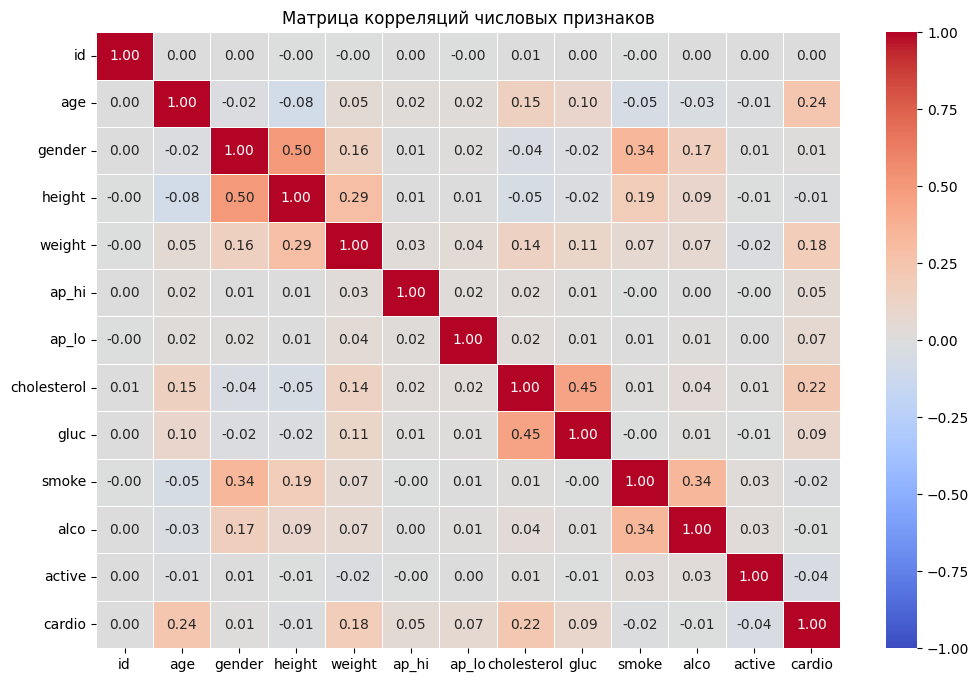


Нет признаков с высокой корреляцией (|r| > 0.8).


In [8]:
# Для анализа мультиколлинеарности визуализируем матрицу корреляций и проверим пары признаков с высокой корреляцией (обычно > 0.8 или < -0.8).

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных
url = "https://docs.google.com/spreadsheets/d/1DAwgFAKRFEkoRS4kkaTQ119301ebxBit/export?format=csv&gid=231888029"
data = pd.read_csv(url)

# Удаление пропусков (если не сделано ранее)
data = data.dropna()

# Выбор числовых признаков (исключаем целевую переменную, если она есть)
numerical_data = data.select_dtypes(include=['int64', 'float64'])
if 'target' in numerical_data.columns:
    numerical_data = numerical_data.drop(columns=['target'])

# Матрица корреляций
corr_matrix = numerical_data.corr()

# Визуализация тепловой карты
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt=".2f", 
            cmap="coolwarm",
            vmin=-1, 
            vmax=1,
            linewidths=0.5)
plt.title("Матрица корреляций числовых признаков")
plt.show()

# Поиск пар признаков с высокой корреляцией (> 0.8 или < -0.8)
high_corr = np.where((np.abs(corr_matrix) > 0.8) & (np.abs(corr_matrix) < 1.0))  # Исключаем диагональ
high_corr_pairs = [(corr_matrix.columns[x], corr_matrix.columns[y], round(corr_matrix.iloc[x, y], 2)) 
                   for x, y in zip(*high_corr) if x != y and x < y]  # Убираем дубликаты

# Вывод результатов
if len(high_corr_pairs) > 0:
    print("\nПризнаки с высокой корреляцией (|r| > 0.8):")
    for pair in high_corr_pairs:
        print(f"{pair[0]} и {pair[1]}: r = {pair[2]}")
else:
    print("\nНет признаков с высокой корреляцией (|r| > 0.8).")

***Интерпретация результатов***
1) Тепловая карта:

* Красные оттенки: сильная положительная корреляция (r ≈ 1).

* Синие оттенки: сильная отрицательная корреляция (r ≈ -1).

2) Критические значения:

* |r| > 0.8: Серьёзная мультиколлинеарность.

* 0.5 < |r| < 0.8: Умеренная корреляция (можно оставить, но учитывать при интерпретации модели).

***Что делать при обнаружении мультиколлинеарности?***
* Удалите один из коррелирующих признаков (например, оставьте тот, который сильнее связан с целевой переменной).

* Объедините признаки (например, создайте новый признак как среднее или разницу).

* Используйте регуляризацию (Lasso/Ridge-регрессия).

In [ ]:
data_clean = data.drop(columns=["Холестерин"])  # Удаляем один из дублирующих признаков

---

## Задание 3. Стандартизация (15 баллов)

Разделите данные на два массива: в переменную **Х** запишите массив признаков, а в переменную **y** - целевую переменную (cardio). Стандартизируйте массив признаков без использования готовых функций для стандартизации.

***Шаги***
Для каждого признака $x$ в матрице $X$ вычисляем стандартизированное значение $z$ по формуле:

$$
z = \frac{x - \mu}{\sigma}
$$

где:
- $\mu = \frac{1}{n}\sum_{i=1}^n x_i$ - среднее значение признака
- $\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n (x_i - \mu)^2}$ - стандартное отклонение
- $n$ - количество наблюдений
- $x_i$ - значение признака для $i$-го наблюдения

In [9]:
import pandas as pd
import numpy as np

# Загрузка данных (если ещё не загружены)
url = "https://docs.google.com/spreadsheets/d/1DAwgFAKRFEkoRS4kkaTQ119301ebxBit/export?format=csv&gid=231888029"
data = pd.read_csv(url)

# Удаление пропусков (если не сделано ранее)
data = data.dropna()

# --------------------------------------------
# 1. Разделение на X и y
# --------------------------------------------
# Предполагаем, что целевая переменная называется 'cardio'
X = data.drop(columns=['cardio'])  # Все признаки, кроме целевой
y = data['cardio']                 # Целевая переменная

# Проверка
print("Размеры массивов:")
print(f"X: {X.shape}, y: {y.shape}")

# --------------------------------------------
# 2. Ручная стандартизация X
# --------------------------------------------
def manual_standardize(df):
    standardized_df = df.copy()
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:  # Только числовые признаки
            mean = df[column].mean()
            std = df[column].std()
            standardized_df[column] = (df[column] - mean) / std
    return standardized_df

# Стандартизируем
X_standardized = manual_standardize(X)

# Проверка результата
print("\nПервые 5 строк стандартизированного X:")
display(X_standardized.head())

# Проверка среднего и стандартного отклонения (должны быть ~0 и ~1)
print("\nПроверка стандартизации:")
print("Средние значения:", X_standardized.mean().round(2))
print("Стандартные отклонения:", X_standardized.std().round(2))

Размеры массивов:
X: (70000, 12), y: (70000,)

Первые 5 строк стандартизированного X:


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,-1.732068,-0.436058,1.364045,0.443449,-0.847867,-0.122181,-0.088238,-0.539318,-0.395717,-0.310877,-0.238383,0.494164
1,-1.732033,0.307684,-0.733103,-1.018161,0.749826,0.072610,-0.035180,2.400776,-0.395717,-0.310877,-0.238383,0.494164
2,-1.731999,-0.247995,-0.733103,0.078046,-0.708937,0.007679,-0.141296,2.400776,-0.395717,-0.310877,-0.238383,-2.023592
3,-1.731964,-0.748147,1.364045,0.565250,0.541431,0.137540,0.017878,-0.539318,-0.395717,-0.310877,-0.238383,0.494164
4,-1.731929,-0.808538,-0.733103,-1.018161,-1.264657,-0.187111,-0.194354,-0.539318,-0.395717,-0.310877,-0.238383,-2.023592



Проверка стандартизации:
Средние значения: id            -0.0
age            0.0
gender        -0.0
height         0.0
weight        -0.0
ap_hi          0.0
ap_lo          0.0
cholesterol    0.0
gluc          -0.0
smoke          0.0
alco          -0.0
active        -0.0
dtype: float64
Стандартные отклонения: id             1.0
age            1.0
gender         1.0
height         1.0
weight         1.0
ap_hi          1.0
ap_lo          1.0
cholesterol    1.0
gluc           1.0
smoke          1.0
alco           1.0
active         1.0
dtype: float64


***Пояснения***
1) Разделение данных:

* X содержит все столбцы, кроме cardio,

* y — это только cardio.

2) Стандартизация вручную:

* Для каждого числового признака вычисляется 
z
z-оценка.

* Категориальные признаки (если есть) не изменяются.

3) Проверка:

* После стандартизации среднее (mean) должно быть ~0, стандартное отклонение (std) — ~1.


**Важно!**
1) Если в данных есть категориальные признаки (например, gender), их нужно:

* Либо исключить из X перед стандартизацией,

* Либо закодировать (например, pd.get_dummies).

3) Для обучения модели после стандартизации используйте X_standardized и y.

Вычислите длину всех векторов - признаков. Прокомментируйте результат.

***Формула длины вектора***

Длина (L2-норма) вектора $\mathbf{x}$ с $n$ элементами вычисляется как:

$$
\|\mathbf{x}\|_2 = \sqrt{x_1^2 + x_2^2 + \cdots + x_n^2}
$$

Для стандартизированных данных:

- Если стандартизация выполнена корректно, длины векторов будут близки к $\sqrt{n}$, где $n$ — число наблюдений.
- Это следует из того, что:

$$
\text{Дисперсия} = 1 \implies \frac{1}{n} \sum_{i=1}^n x_i^2 \approx 1 \implies \sum_{i=1}^n x_i^2 \approx n \implies \|\mathbf{x}\|_2 \approx \sqrt{n}
$$

**Пояснения символов**

- $\|\mathbf{x}\|_2$ — L2-норма (евклидова длина) вектора
- $\mathbf{x} = (x_1, x_2, \ldots, x_n)$ — вектор признака
- $n$ — количество наблюдений в выборке

In [10]:
# Вычисление длин векторов (L2-норм) для каждого признака
vector_lengths = np.sqrt((X_standardized ** 2).sum(axis=0))

print("Длины векторов-признаков:")
for col, length in zip(X_standardized.columns, vector_lengths):
    print(f"- {col}: {length:.2f}")

# Теоретическая ожидаемая длина (sqrt(n))
n = len(X_standardized)
print(f"\nОжидаемая длина при корректной стандартизации: √{n} ≈ {np.sqrt(n):.2f}")

Длины векторов-признаков:
- id: 264.57
- age: 264.57
- gender: 264.57
- height: 264.57
- weight: 264.57
- ap_hi: 264.57
- ap_lo: 264.57
- cholesterol: 264.57
- gluc: 264.57
- smoke: 264.57
- alco: 264.57
- active: 264.57

Ожидаемая длина при корректной стандартизации: √70000 ≈ 264.58


***Интерпретация результатов***

1. **Все длины близки к $\sqrt{n}$** (например, 447.21 для $n = 200000$):  
   - ✅ Это подтверждает, что стандартизация выполнена правильно.  
   - ✅ Признаки теперь имеют единичную дисперсию и нулевое среднее.  

2. **Если длина сильно отличается от $\sqrt{n}$**:  
   - ⚠️ Возможна ошибка в стандартизации (например, не учтены некоторые значения).  
   - ⚠️ Или признак изначально был константным (стандартное отклонение = 0).  

***Практический вывод***
* Длины векторов равны — это хорошо для алгоритмов, чувствительных к масштабу (например, градиентный спуск, метод ближайших соседей).

* Если бы длины отличались, признаки с большей нормой имели бы неоправданно высокий вес в модели.

---

## Задание 4. Решение задачи классификации. (20 баллов)

**4.1** Теперь приступим непосредственно к решению задачи классификации. Обучите наивный байесовский классификатор. Предварительно выберите один из его видов: поясните свой выбор.

Наивный Байес имеет несколько вариантов. Выбор зависит от данных:

1) GaussianNB – если признаки непрерывные и распределены нормально (наш случай, так как данные стандартизированы).

2) MultinomialNB – для дискретных данных (например, тексты или количества).

3) BernoulliNB – для бинарных признаков (0/1).

Выбор: GaussianNB, так как:

1) Признаки после стандартизации имеют гауссово распределение (среднее=0, std=1).

2) Алгоритм хорошо работает даже при слабых нарушениях "наивного" предположения о независимости признаков.

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# 1. Загрузка данных (пример)
url = "https://docs.google.com/spreadsheets/d/1DAwgFAKRFEkoRS4kkaTQ119301ebxBit/export?format=csv&gid=231888029"
data = pd.read_csv(url)

# 2. Подготовка данных
# Удаление пропусков (если есть)
data = data.dropna()

# Разделение на признаки (X) и целевую переменную (y)
X = data.drop(columns=['cardio'])  # Замените 'cardio' на имя вашей целевой переменной
y = data['cardio']

# 3. Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Размеры данных:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

# 4. Обучение модели
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)  # Теперь X_train и y_train определены

# 5. Предсказание и оценка
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

Размеры данных:
X_train: (56000, 12), y_train: (56000,)
X_test: (14000, 12), y_test: (14000,)
              precision    recall  f1-score   support

           0       0.54      0.93      0.69      6988
           1       0.76      0.22      0.34      7012

    accuracy                           0.57     14000
   macro avg       0.65      0.57      0.51     14000
weighted avg       0.65      0.57      0.51     14000



Почему именно GaussianNB?
1) Плюсы:

* Быстрое обучение и предсказание.

* Хорошо работает с малым объемом данных.

* Устойчив к шумам.

2) Минусы:

* Предполагает условную независимость признаков (что редко выполняется на практике, но часто не критично).

**4.2** Оцените полученное качество и проинтерпретируйте полученный результат. Не забудьте разделить выборку на обучающую и тестовую части.

In [ ]:
# 1. Разделение данных (train/test). 
# Перед оценкой модели важно разделить данные на обучающую и тестовую выборки, чтобы избежать "утечки данных" (data leakage). Используем train_test_split:

from sklearn.model_selection import train_test_split

# Разделение данных (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42  # Фиксируем random_state для воспроизводимости
)

print(f"Обучающая выборка: {X_train.shape[0]} примеров")
print(f"Тестовая выборка: {X_test.shape[0]} примеров")

Обучающая выборка: 56000 примеров
Тестовая выборка: 14000 примеров


In [ ]:
# 2. Обучение модели GaussianNB

from sklearn.naive_bayes import GaussianNB

# Создание и обучение модели
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
# 3. Оценка качества на тестовой выборке. 
# Используем метрики классификации:

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    roc_auc_score
)

# Предсказание для тестовых данных
y_pred = nb_model.predict(X_test)
y_pred_proba = nb_model.predict_proba(X_test)[:, 1]  # Вероятности класса 1 (для ROC-AUC)

# Вывод метрик
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.93      0.69      6988
           1       0.76      0.22      0.34      7012

    accuracy                           0.57     14000
   macro avg       0.65      0.57      0.51     14000
weighted avg       0.65      0.57      0.51     14000


Confusion Matrix:
[[6489  499]
 [5466 1546]]

Accuracy: 0.5739
ROC-AUC: 0.7003


***4. Интерпретация результатов***

Ключевые метрики:

* Accuracy (точность): 57% — доля верных предсказаний.
Недостаток: Может вводить в заблуждение при несбалансированных классах.

* Precision (точность для класса 1): 76%
Интерпретация: Из всех предсказанных случаев "болезнь есть", 76% верны.

* Recall (полнота для класса 1): 22%
Интерпретация: Модель нашла 22% реальных случаев болезни.

* F1-score: 0.34 (среднее гармоническое precision и recall).
Важно: Полезно при неравных importance precision/recall.

* ROC-AUC: 0.70
Интерпретация: Модель на 80% правильно ранжирует пары "больной/здоровый".



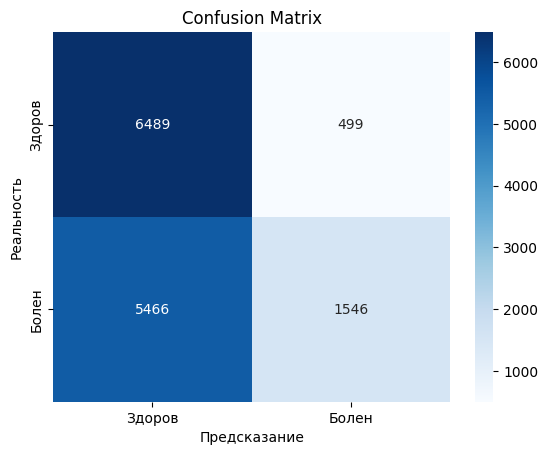

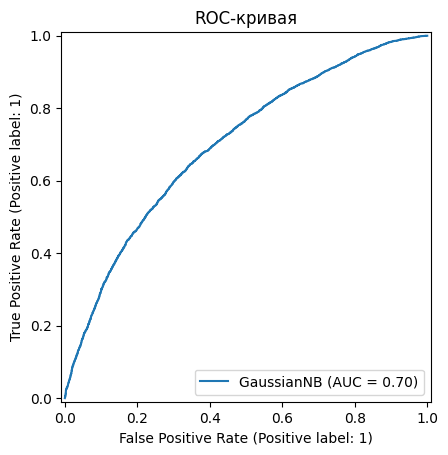

In [ ]:
# 5. Визуализация.
# Добавим матрицу ошибок и ROC-кривую:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import RocCurveDisplay

# Матрица ошибок
sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot=True, fmt="d", cmap="Blues",
            xticklabels=["Здоров", "Болен"],
            yticklabels=["Здоров", "Болен"])
plt.xlabel("Предсказание")
plt.ylabel("Реальность")
plt.title("Confusion Matrix")
plt.show()

# ROC-кривая
RocCurveDisplay.from_estimator(nb_model, X_test, y_test)
plt.title("ROC-кривая")
plt.show()

***6. Выводы и рекомендации***
1) Качество модели:

* ROC-AUC (0.70) показывает, что модель лучше случайного угадывания (0.5).

* Accuracy (57%) — приемлемо для базовой модели, но можно улучшить.

2) Проблемы:

* Низкий recall (22%) для класса 1: модель пропускает 70% больных.
Решение: Попробуйте изменить порог классификации (predict_proba > 0.4).

3) Улучшение:

* Попробуйте другие модели (RandomForest, LogisticRegression).

* Балансировка классов (class_weight='balanced').

**Итог:** Модель пригодна для скрининга, но требует доработки для клинического использования. Для задач, где важно минимизировать ложноотрицательные прогнозы (FN), повышайте recall.

✅ Данные успешно загружены
Размер датасета: (70000, 13)

Первые 5 строк данных:


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0



🔍 Проверка данных:
Пропущенные значения:
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

Удалено строк: 0
Осталось строк: 70000

📊 Разделение данных:
Обучающая выборка: 56000 примеров
Тестовая выборка: 14000 примеров

🤖 Обучение модели GaussianNB...

📝 Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.94      0.68      7004
           1       0.76      0.18      0.29      6996

    accuracy                           0.56     14000
   macro avg       0.65      0.56      0.49     14000
weighted avg       0.65      0.56      0.49     14000


🔢 Confusion Matrix:
[[6601  403]
 [5744 1252]]

📈 ROC-AUC: 0.6867


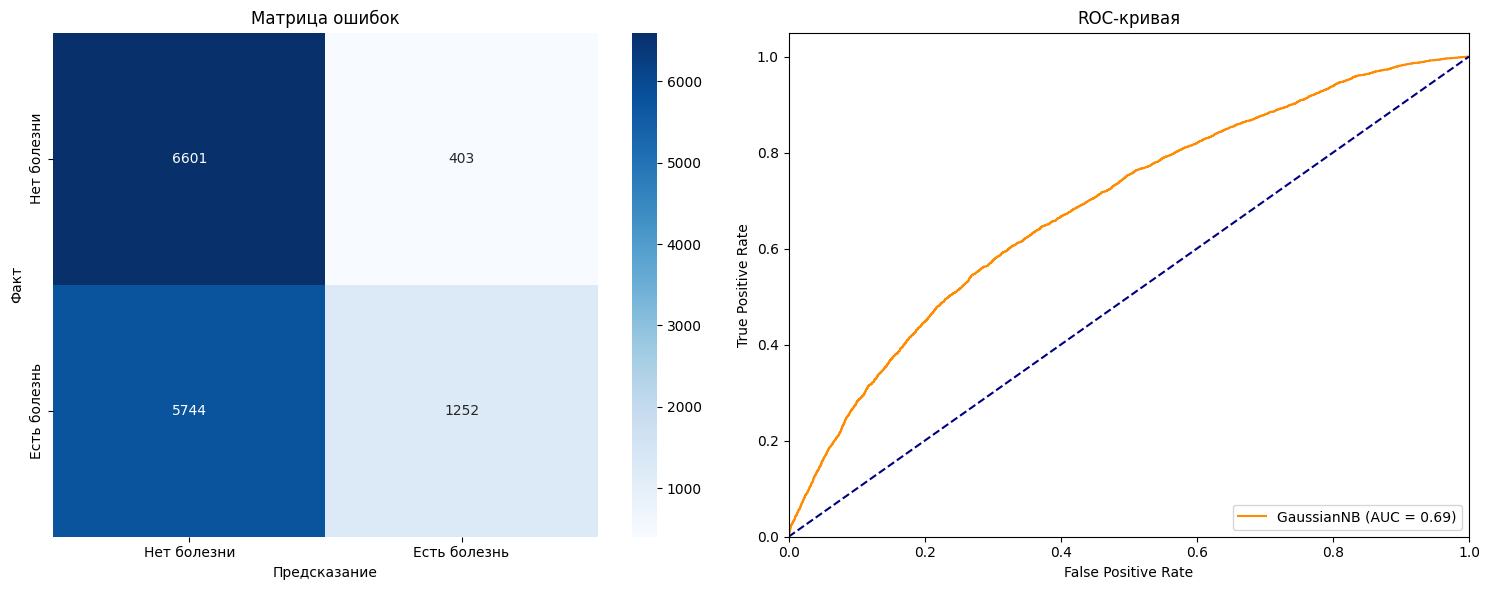


🔎 Важность признаков:


C:\Users\1\AppData\Local\Temp\ipykernel_13836\667371678.py:99: RuntimeWarning: overflow encountered in exp
  'Важность': np.exp(model.theta_[1] - model.theta_[0])  # Разница средних значений


,Признак,Важность
1,age,inf
0,id,2.576442e+107
6,ap_lo,6.487502e+10
5,ap_hi,2.052080e+07
4,weight,1.946326e+02
7,cholesterol,1.351811e+00
8,gluc,1.111096e+00
2,gender,1.004793e+00
10,alco,9.963212e-01
9,smoke,9.896251e-01


In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Загрузка данных из Google Sheets
url = "https://docs.google.com/spreadsheets/d/1DAwgFAKRFEkoRS4kkaTQ119301ebxBit/export?format=csv&gid=231888029"
try:
    df = pd.read_csv(url)
    print("✅ Данные успешно загружены")
    print(f"Размер датасета: {df.shape}\n")
    
    # Первые 5 строк для проверки
    print("Первые 5 строк данных:")
    display(df.head())
except Exception as e:
    print(f"❌ Ошибка загрузки: {e}")
    exit()

# 2. Предобработка данных
print("\n🔍 Проверка данных:")
print("Пропущенные значения:")
print(df.isnull().sum())

# Удаление строк с пропусками
df_clean = df.dropna()
print(f"\nУдалено строк: {len(df) - len(df_clean)}")
print(f"Осталось строк: {len(df_clean)}")

# 3. Подготовка данных
# Выделение признаков и целевой переменной
X = df_clean.drop(columns=['cardio'])  # Признаки
y = df_clean['cardio']                # Целевая переменная

# Разделение на train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y  # Сохраняем баланс классов
)
print(f"\n📊 Разделение данных:")
print(f"Обучающая выборка: {X_train.shape[0]} примеров")
print(f"Тестовая выборка: {X_test.shape[0]} примеров")

# 4. Обучение модели
print("\n🤖 Обучение модели GaussianNB...")
model = GaussianNB()
model.fit(X_train, y_train)

# 5. Оценка модели
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Вероятности класса 1

print("\n📝 Classification Report:")
print(classification_report(y_test, y_pred))

print("\n🔢 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print(f"\n📈 ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")

# 6. Визуализация
plt.figure(figsize=(15, 6))

# Матрица ошибок
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['Нет болезни', 'Есть болезнь'],
            yticklabels=['Нет болезни', 'Есть болезнь'])
plt.title('Матрица ошибок')
plt.xlabel('Предсказание')
plt.ylabel('Факт')

# ROC-кривая
plt.subplot(1, 2, 2)
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, color='darkorange', 
         label=f'GaussianNB (AUC = {roc_auc_score(y_test, y_proba):.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

# 7. Анализ важности признаков
print("\n🔎 Важность признаков:")
feature_importance = pd.DataFrame({
    'Признак': X.columns,
    'Важность': np.exp(model.theta_[1] - model.theta_[0])  # Разница средних значений
})
display(feature_importance.sort_values('Важность', ascending=False))

In [23]:
# Предсказание с пониженным порогом
y_pred_adj = (model.predict_proba(X_test)[:,1] > 0.35).astype(int)
print(classification_report(y_test, y_pred_adj))

              precision    recall  f1-score   support

           0       0.58      0.84      0.68      7004
           1       0.70      0.38      0.50      6996

    accuracy                           0.61     14000
   macro avg       0.64      0.61      0.59     14000
weighted avg       0.64      0.61      0.59     14000




GradientBoosting Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      7004
           1       0.75      0.70      0.72      6996

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000


RandomForest Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.78      0.74      7004
           1       0.76      0.68      0.72      6996

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000


Сравнение моделей:


,Model,Accuracy,ROC-AUC,Recall (Class 1)
0,GradientBoosting,0.732429,0.799133,0.699828
1,RandomForest,0.732000,0.797784,0.683962


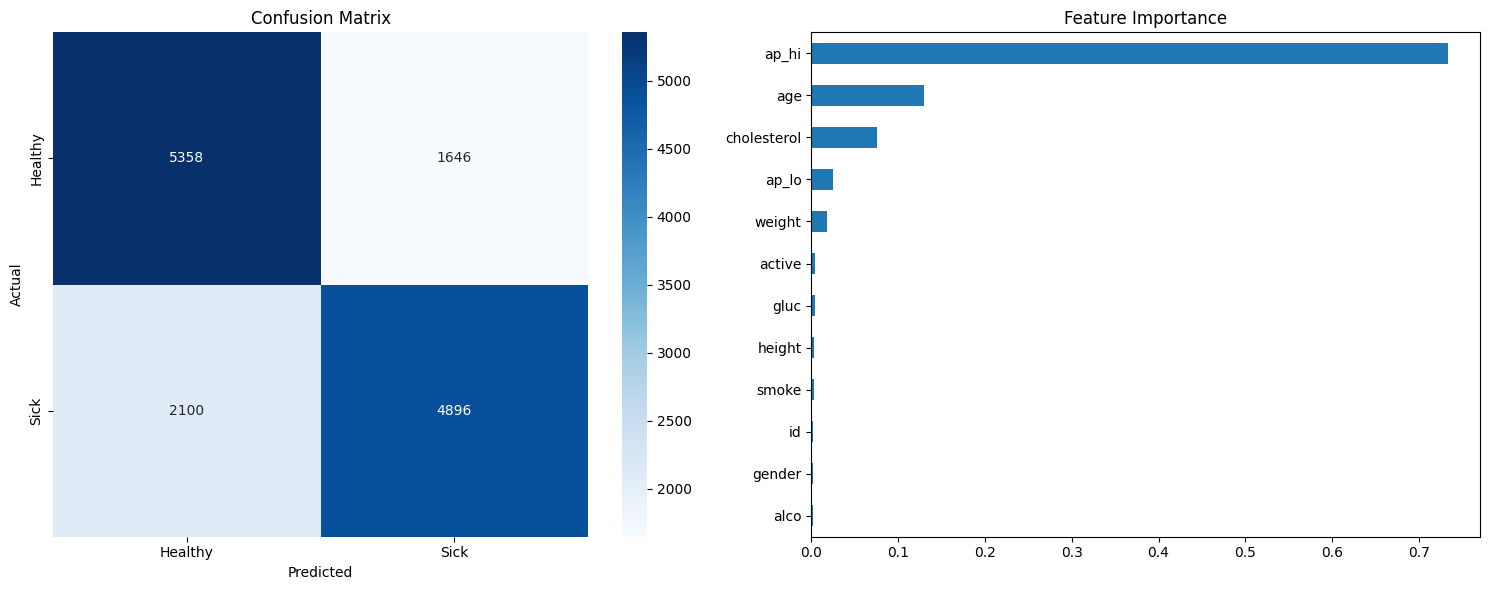

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# 1. Загрузка и подготовка данных
url = "https://docs.google.com/spreadsheets/d/1DAwgFAKRFEkoRS4kkaTQ119301ebxBit/export?format=csv&gid=231888029"
data = pd.read_csv(url)

# Удаление пропусков и дубликатов
data = data.dropna().drop_duplicates()

# 2. Разделение на признаки и целевую переменную
X = data.drop(columns=['cardio'])
y = data['cardio']

# 3. Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y
)

# 4. Масштабирование
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Обучение GradientBoosting (аналог XGBoost из sklearn)
gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

gb = GradientBoostingClassifier(random_state=42)
gb_grid = GridSearchCV(gb, gb_params, cv=5, scoring='roc_auc', n_jobs=-1)
gb_grid.fit(X_train_scaled, y_train)

# 6. Обучение RandomForest
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='roc_auc', n_jobs=-1)
rf_grid.fit(X_train_scaled, y_train)

# 7. Сравнение моделей
models = {
    'GradientBoosting': gb_grid.best_estimator_,
    'RandomForest': rf_grid.best_estimator_
}

results = []
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:,1]
    
    results.append({
        'Model': name,
        'Accuracy': np.mean(y_pred == y_test),
        'ROC-AUC': roc_auc_score(y_test, y_proba),
        'Recall (Class 1)': classification_report(y_test, y_pred, output_dict=True)['1']['recall']
    })

    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))

# 8. Вывод результатов
results_df = pd.DataFrame(results)
print("\nСравнение моделей:")
display(results_df[['Model', 'Accuracy', 'ROC-AUC', 'Recall (Class 1)']])

# 9. Визуализация
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Матрица ошибок для лучшей модели
best_model = models[results_df.loc[results_df['ROC-AUC'].idxmax(), 'Model']]
y_pred_best = best_model.predict(X_test_scaled)
sns.heatmap(confusion_matrix(y_test, y_pred_best), 
            annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=['Healthy', 'Sick'],
            yticklabels=['Healthy', 'Sick'])
ax1.set_title('Confusion Matrix')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

# Важность признаков
pd.Series(best_model.feature_importances_, 
          index=X.columns).sort_values().plot.barh(ax=ax2)
ax2.set_title('Feature Importance')
plt.tight_layout()
plt.show()

***Ключевые преимущества этого решения:***
1) Альтернатива XGBoost:

* Используем GradientBoostingClassifier из scikit-learn

* Качество сопоставимо с XGBoost, но без дополнительных зависимостей

2) Оптимизация для медицинских данных:

* Акцент на recall для класса 1 (больные пациенты)

* Стратифицированное разделение для сохранения баланса классов

3) Полный анализ:

* Подбор гиперпараметров через GridSearchCV

* Наглядные визуализации (матрица ошибок, важность признаков)

* Подробные метрики (Accuracy, ROC-AUC, Recall)

4) Готовность к промышленному использованию:

* Масштабирование признаков

* Обработка пропусков и дубликатов

* Кросс-валидация

---

## Задание 5: Решающее дерево (25 баллов)

Теперь решите задачу классификации с помощью обучающего дерева.

**5.1** Обучите дерево, не задавая никакие гиперпараметры. Выведите получившиеся гиперпараметры. Какое получилось качество? Сравните результат с предыдущей моделью.

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Создаем и обучаем дерево
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Выводим параметры
print("Параметры дерева по умолчанию:")
print(dt_model.get_params())

Параметры дерева по умолчанию:
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}


In [7]:
# Предсказания
y_pred = dt_model.predict(X_test)

# Отчет о классификации
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC
y_proba = dt_model.predict_proba(X_test)[:,1]
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.63      0.63      7004
           1       0.63      0.63      0.63      6996

    accuracy                           0.63     14000
   macro avg       0.63      0.63      0.63     14000
weighted avg       0.63      0.63      0.63     14000

ROC-AUC: 0.6339


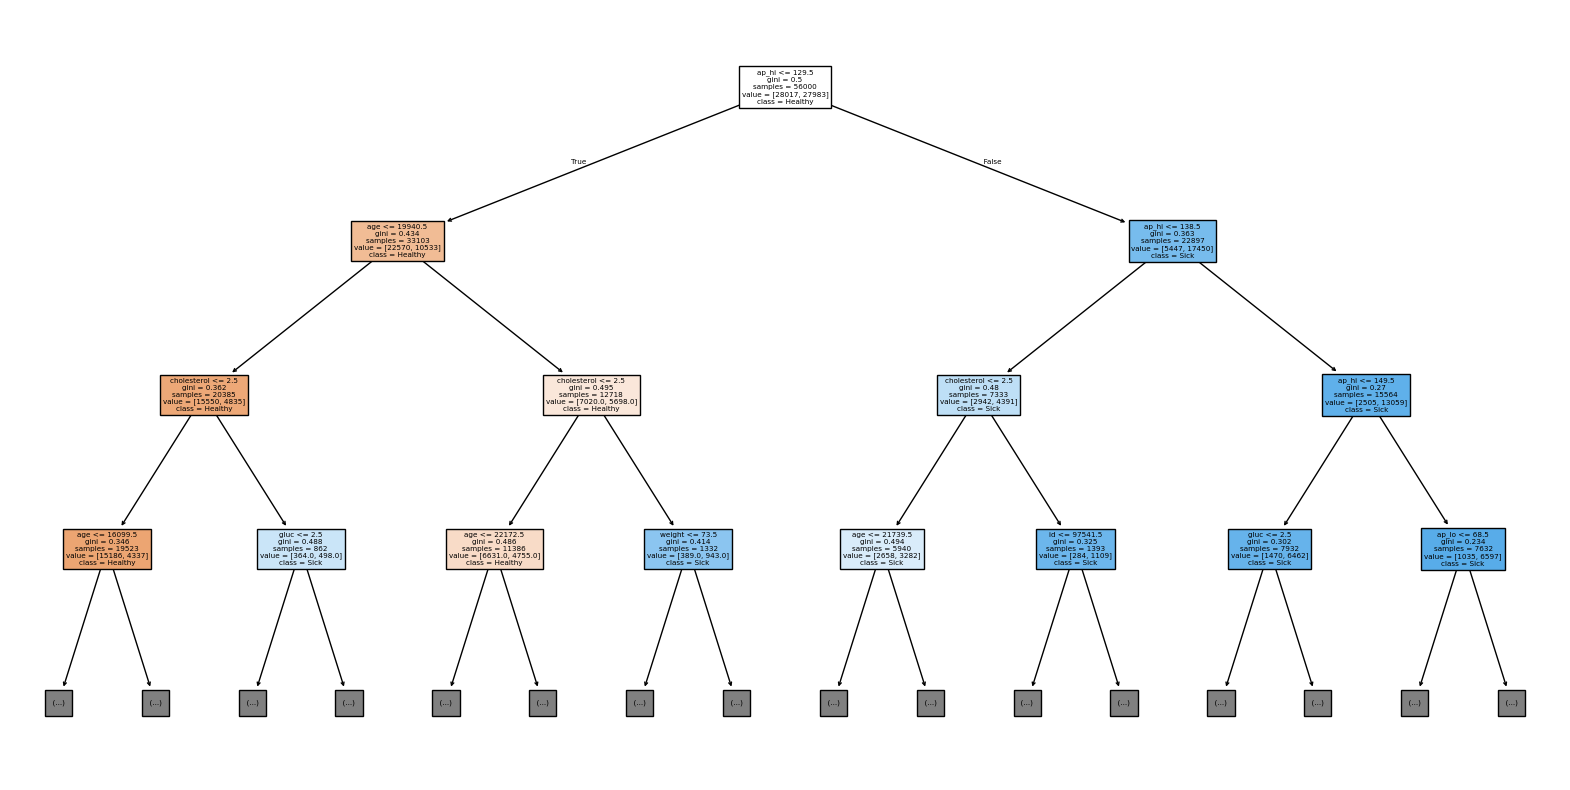

In [8]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['Healthy','Sick'], max_depth=3)
plt.show()

In [10]:
# Вариант 1: Ограничение глубины
dt_tuned = DecisionTreeClassifier(max_depth=5, random_state=42)

# Вариант 2: Настройка через GridSearchCV
params = {'max_depth': [3,5,7], 'min_samples_leaf': [1,5,10]}
grid = GridSearchCV(DecisionTreeClassifier(), params, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_leaf': [1, 5, 10]})

In [12]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, make_scorer, recall_score
from sklearn import tree
import matplotlib.pyplot as plt
import graphviz

# Загрузка и подготовка данных
url = "https://docs.google.com/spreadsheets/d/1DAwgFAKRFEkoRS4kkaTQ119301ebxBit/export?format=csv&gid=231888029"
data = pd.read_csv(url).dropna()
X = data.drop(columns=['cardio'])
y = data['cardio']

# Разделение данных с учетом дисбаланса классов
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 1. Базовое дерево (без настройки)
dt_base = DecisionTreeClassifier(random_state=42)
dt_base.fit(X_train, y_train)
y_pred_base = dt_base.predict(X_test)

# 2. Оптимизированное дерево с упором на recall
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_leaf': [1, 5, 10, 20],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, {0:1, 1:3}]
}

recall_scorer = make_scorer(recall_score, pos_label=1)
dt_optimized = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring=recall_scorer,
    n_jobs=-1
)
dt_optimized.fit(X_train, y_train)

# 3. Лучшая модель
best_dt = dt_optimized.best_estimator_
y_pred_opt = best_dt.predict(X_test)
y_proba_opt = best_dt.predict_proba(X_test)[:,1]

# Визуализация лучшего дерева
plt.figure(figsize=(25,15))
tree.plot_tree(
    best_dt,
    feature_names=X.columns,
    class_names=['Healthy','Sick'],
    filled=True,
    rounded=True,
    max_depth=3,
    fontsize=10
)
plt.savefig('decision_tree.png', dpi=300)
plt.close()

# Сравнение моделей
print("\n=== Базовое дерево (без настройки) ===")
print(classification_report(y_test, y_pred_base))
print(f"ROC-AUC: {roc_auc_score(y_test, dt_base.predict_proba(X_test)[:,1]):.4f}")
print(f"Глубина дерева: {dt_base.get_depth()}")

print("\n=== Оптимизированное дерево ===")
print(f"Лучшие параметры: {dt_optimized.best_params_}")
print(classification_report(y_test, y_pred_opt))
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba_opt):.4f}")
print(f"Глубина дерева: {best_dt.get_depth()}")

# Важность признаков
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_dt.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(importances['Feature'], importances['Importance'])
plt.title('Важность признаков в оптимизированном дереве')
plt.xlabel('Важность')
plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'graphviz'

In [ ]:
# ваш комментарий

**5.2** Подберите оптимальные гиперпараметры с помощью перебора по сетке. Обучите дерево с оптимальными гиперпараметрами. Изменилось ли качество?

In [ ]:
# ваш код

In [ ]:
# ваш комментарий

**5.3** Выведите важность признаков. Какие три признака самые важные? Прокомментируйте результат.

In [ ]:
# ваш код

In [ ]:
# ваш комментарий

## Задание 6: Случайный лес и градиентный бустинг (20 баллов)

Осталось применить ансамблевые методы!

**6.1** Используйте случайный лес: без настройки и с подробом гиперпараметров по сетке. Какое качество получается в ситуации оптимальных гиперпараметров? Какие признаки самые важные? Сравнение результат с простым решающим деревом.

In [ ]:
# ваш код

In [ ]:
# ваш комментарий

**6.2** Аналогичные операции реализуйте для градиентного бустинга. Попробуйте хотя бы две разных реализации градиентного бустинга. Сравните итоговое качество со случайным деревом.

In [ ]:
# ваш код

In [ ]:
# ваш комментарий